<a href="https://colab.research.google.com/github/Shankhadeep2000/-Google-Data-Analytics-Capstone-Project-Cyclistic-bike-share-analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
training = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
training['train_test'] = 1
test['train_test'] = 0 
all_data = pd.concat([training , test])

In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
training.info().columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


AttributeError: ignored

In [6]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

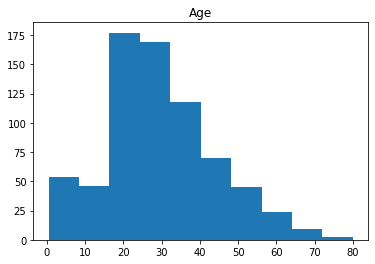

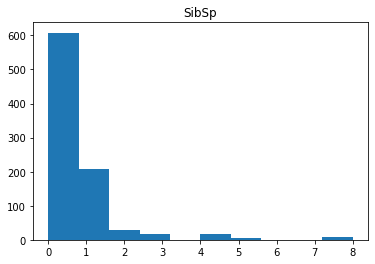

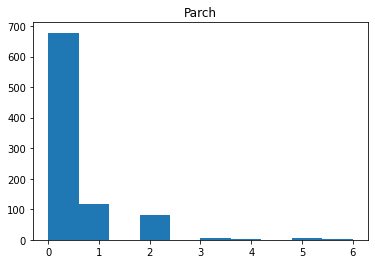

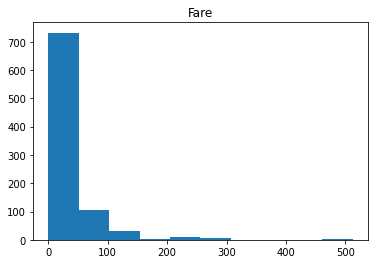

In [7]:
for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

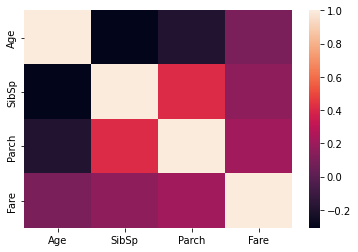

In [8]:
training.corr()
sns.heatmap(df_num.corr())

In [9]:
pd.pivot_table(training , index='Survived' , values=['Age' , 'SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


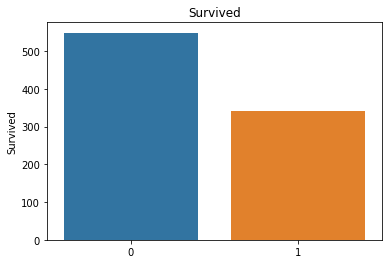

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


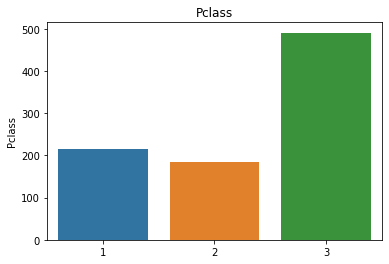

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


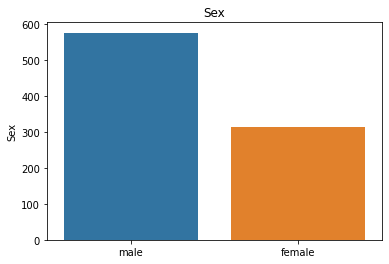

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


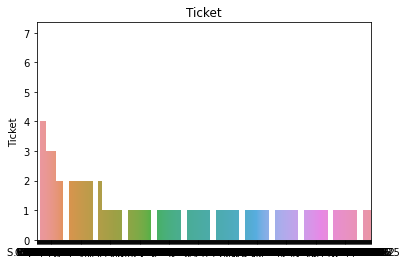

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


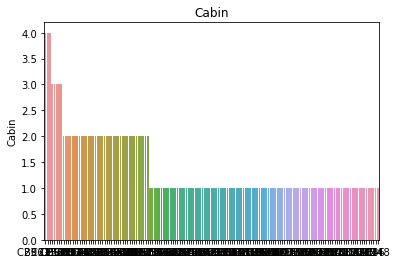

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


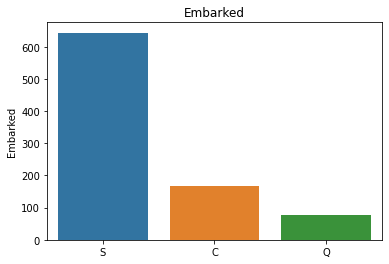

In [10]:
for i in df_cat.columns:
  sns.barplot(df_cat[i].value_counts().index , df_cat[i].value_counts()).set_title(i)
  plt.show()

In [11]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


**Feature Engineering**

In [12]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [13]:
training['Cabin'].head(29)


0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
Name: Cabin, dtype: object

In [14]:
training['cabin_multiple']= training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')) )
training["cabin_multiple"].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [15]:
pd.pivot_table(training, index='Survived' , columns= 'cabin_multiple' , values= 'Ticket' , aggfunc='count' )

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [16]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [17]:
print(training['cabin_adv'].value_counts())
pd.pivot_table(training , index='Survived' , columns='cabin_adv' , values='Ticket' , aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [18]:

training['Ticket'].head(29)
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [19]:
training['cabin_adv']

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: cabin_adv, Length: 891, dtype: object

In [20]:
training['numeric_ticket'].value_counts()


1    661
0    230
Name: numeric_ticket, dtype: int64

In [21]:
pd.pivot_table(training , index='Survived' , columns='numeric_ticket' , values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [22]:
pd.set_option("max_row" , None)
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [23]:
training['Name'].head(29)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [24]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [25]:
pd.pivot_table(training,index='Survived' , columns='name_title' , values='Ticket' , aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [26]:
training['Embarked'].head(100)

0       S
1       C
2       S
3       S
4       S
5       Q
6       S
7       S
8       S
9       C
10      S
11      S
12      S
13      S
14      S
15      S
16      Q
17      S
18      S
19      C
20      S
21      S
22      Q
23      S
24      S
25      S
26      C
27      S
28      Q
29      S
30      C
31      C
32      Q
33      S
34      C
35      S
36      C
37      S
38      S
39      C
40      S
41      S
42      C
43      C
44      Q
45      S
46      Q
47      Q
48      C
49      S
50      S
51      S
52      C
53      S
54      C
55      S
56      S
57      C
58      S
59      S
60      C
61    NaN
62      S
63      S
64      C
65      C
66      S
67      S
68      S
69      S
70      S
71      S
72      S
73      C
74      S
75      S
76      S
77      S
78      S
79      S
80      S
81      S
82      Q
83      S
84      S
85      S
86      S
87      S
88      S
89      S
90      S
91      S
92      S
93      S
94      S
95      S
96      C
97      C
98      S
99      S


**Data Preprocessing for Model**

In [27]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [28]:
all_data['Fare'] = all_data.Fare.fillna(all_data['Fare'].median())
all_data['Age'] = all_data.Age.fillna(all_data['Age'].median())

In [29]:
all_data.dropna(subset=['Embarked'] , inplace=True)#removing all the null values in embarked column

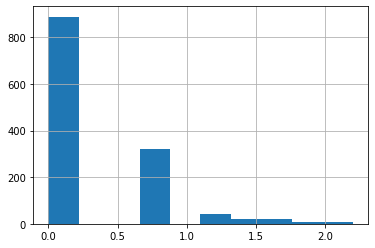

In [30]:
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

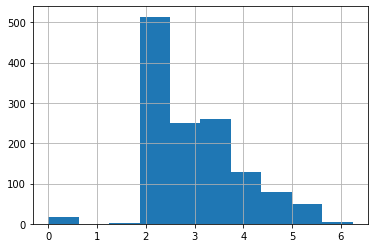

In [31]:
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [32]:
all_data['Pclass'].head(29)
all_data['Pclass'] = all_data.Pclass.astype(str)

In [33]:
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

In [34]:
x_train=all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis=1)
x_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'],axis=1)

In [35]:
y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

(889,)

In [36]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dona,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.662297,0.480272,-0.445407,1.347870,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.429318,0.480272,-0.445407,1.048255,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.429318,-0.479537,-0.445407,-0.800632,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,-0.114301,-0.479537,-0.445407,-0.755003,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1.904855,-0.479537,-0.445407,1.024328,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,-2.133458,2.399890,0.709647,0.121378,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,-0.191961,-0.479537,1.864701,-0.497471,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,-1.201540,0.480272,-0.445407,0.474827,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
x_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1 ].drop(['train_test'] , axis=1)
x_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'] , axis=1)

y_train = all_data[all_data.train_test == 1].Survived

**Model Building (Baseline Validation Performance)**

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [39]:
gnb = GaussianNB()
cv = cross_val_score(gnb , x_train_scaled , y_train , cv=5)
print(cv)
cv.mean()

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]


0.7221735542436362

In [40]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr , x_train_scaled , y_train , cv=5)
print(cv)
cv.mean()

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]


0.8223068621849807

In [41]:
tree = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(tree , x_train_scaled , y_train , cv =5)
print(cv)
cv.mean()

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]


0.7773122579826065

In [42]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn , x_train_scaled , y_train , cv = 5)
print(cv)
cv.mean()

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]


0.8144416936456548

In [43]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, x_train_scaled , y_train , cv=5)
print(cv)
cv.mean()

[0.80337079 0.79213483 0.84831461 0.73595506 0.82485876]


0.8009268075922046

In [44]:
svm = SVC(probability = True)
cv = cross_val_score(svm , x_train_scaled , y_train , cv=5)
print(cv)
cv.mean()

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]


0.8335555132355742

In [45]:
from xgboost import XGBClassifier
xgb= XGBClassifier(random_state=1)
cv =cross_val_score(xgb , x_train_scaled , y_train ,  cv=5)
print(cv)
cv.mean()

[0.82022472 0.80898876 0.83707865 0.79213483 0.87570621]


0.8268266361962802

In [46]:
from pandas.core.common import random_state
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('knn' , knn) , ('xgb' , xgb) , ('svm' , svm)  , ('tree' , tree)  , ('gnb' , gnb) , ('rf' , rf)] , voting="soft" )

In [47]:
cv = cross_val_score(voting_clf , x_train_scaled , y_train , cv = 5)
print(cv)
cv.mean()

[0.82022472 0.82022472 0.83146067 0.78651685 0.87570621]


0.8268266361962802

In [48]:
voting_clf.fit(x_train_scaled  , y_train)
y_hat_base_vc= voting_clf.predict(x_test_scaled)
base_submission = {'PassengerId': test.PassengerId , 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data= base_submission)
base_submission.to_csv('base_submission.csv', index=False)

**Model Tuneing**

In [49]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [50]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [51]:
lr = LogisticRegression()
parameter = {'max_iter':[2000], 'penalty' : ['l1','l2'] , 'C' : np.logspace(-4, 4, 20), 'solver':['liblinear']}
cv = GridSearchCV(lr , parameter , cv=5 , verbose=True , n_jobs = -1)
best_clf_lr = cv.fit(x_train_scaled , y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [52]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(x_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
KNN
Best Score: 0.8369262997524283
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


In [53]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid , cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(x_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8358027042468101
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


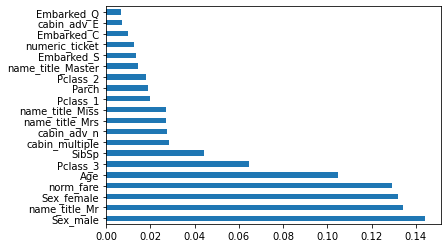

In [54]:
best_rf = best_clf_rf.best_estimator_.fit(x_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=x_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [55]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf' , 'sigmoid'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(x_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 85 candidates, totalling 425 fits
SVC
Best Score: 0.8335555132355742
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [57]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    # 'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(x_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.8526566368310797
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.5, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [58]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(x_test_scaled).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)

In [59]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svm = best_clf_svc.best_estimator_
best_xgb = best_clf_xgb.best_estimator_


voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svm)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svm)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svm), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svm), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,x_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,x_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,x_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,x_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,x_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,x_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,x_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,x_train,y_train,cv=5).mean())

voting_clf_hard : [0.78089888 0.81460674 0.84269663 0.79213483 0.83615819]
voting_clf_hard mean : 0.8132990541484162
voting_clf_soft : [0.78089888 0.81460674 0.83707865 0.80337079 0.85310734]
voting_clf_soft mean : 0.8166888846568907
voting_clf_all : [0.8258427  0.83146067 0.8258427  0.80337079 0.86440678]
voting_clf_all mean : 0.8301847267187202
voting_clf_xgb : [0.82022472 0.83146067 0.83707865 0.80337079 0.85875706]
voting_clf_xgb mean : 0.8301783787215135


In [60]:
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(x_train_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(x_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best Score: 0.8301910747159271
Best Parameters: {'weights': [1, 2, 2]}


In [61]:
voting_clf_hard.fit(x_train_scaled, y_train)
voting_clf_soft.fit(x_train_scaled, y_train)
voting_clf_all.fit(x_train_scaled, y_train)
voting_clf_xgb.fit(x_train_scaled, y_train)
best_rf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=15, max_features=10, min_samples_leaf=3,
                       n_estimators=550, random_state=1)

In [62]:

y_hat_vc_hard = voting_clf_hard.predict(x_test_scaled).astype(int)
y_hat_rf = best_rf.predict(x_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(x_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(x_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(x_test_scaled).astype(int)

In [64]:
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)
final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)

In [65]:
#track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [67]:
print(comparison['difference_hard_all'].head(30))
print(comparison['difference_rf_vc_hard'].head(30))
print(comparison['difference_soft_hard'].head(30))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: difference_hard_all, dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: difference_rf_vc_hard, dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: difference_soft_hard, dtype: int64


In [68]:
comparison.difference_hard_all.value_counts()

0    406
1     12
Name: difference_hard_all, dtype: int64

In [69]:
submission.to_csv('submission_rf.csv', index =False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
submission_5.to_csv('submission_vc_xgb2.csv', index=False)